In [2]:
!wget https://covid.ourworldindata.org/data/owid-covid-data.csv

--2022-01-30 16:26:33--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 188.114.96.19, 188.114.97.19, 2a06:98c1:3121::13, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|188.114.96.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv     [            <=>     ]  42.79M  19.4MB/s    in 2.2s    

2022-01-30 16:26:36 (19.4 MB/s) - ‘owid-covid-data.csv’ saved [44867681]



In [31]:
import pandas as pd
import numpy as np
import geopandas as gpd
import plotly.express as px

In [2]:
df = pd.read_csv("owid-covid-data.csv")

In [3]:
len(df)

158164

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
world.columns

NameError: name 'world' is not defined

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


<AxesSubplot:>

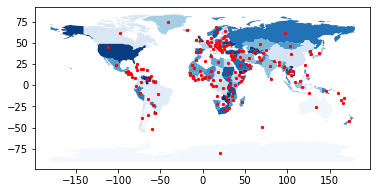

In [6]:
# Access built-in Natural Earth data via GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get a list (dataframe) of country centroids
centroids = world.centroid
centroid_list = pd.concat([world.name, world.iso_a3, centroids], axis=1)

# Plot the results
base = world.plot(column = 'name', cmap = 'Blues')
centroids.plot(ax = base, marker = 'o', color = 'red', markersize = 5)

In [7]:
centroid_list['lon'] = centroid_list[0].apply(lambda point: point.x)
centroid_list['lat'] = centroid_list[0].apply(lambda point: point.y)

In [8]:
centroid_list.head()

,name,iso_a3,0,lon,lat
0,Fiji,FJI,POINT (163.85316 -17.31631),163.853165,-17.316309
1,Tanzania,TZA,POINT (34.75299 -6.25773),34.752990,-6.257732
2,W. Sahara,ESH,POINT (-12.13783 24.29117),-12.137831,24.291173
3,Canada,CAN,POINT (-98.14238 61.46908),-98.142381,61.469076
4,United States of America,USA,POINT (-112.59944 45.70563),-112.599436,45.705628


In [9]:
centroid_list = centroid_list.rename(columns={"iso_a3":"iso_code"})

In [10]:
df = pd.merge(df, centroid_list[["iso_code", "lon", "lat"]], on="iso_code", how="inner")

In [11]:
len(df)

115881

In [12]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,lon,lat
115876,ZWE,Africa,Zimbabwe,2022-01-25,228776.0,235.0,330.857,5316.0,11.0,8.286,...,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,29.788548,-18.906988
115877,ZWE,Africa,Zimbabwe,2022-01-26,228943.0,167.0,293.714,5321.0,5.0,7.857,...,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,29.788548,-18.906988
115878,ZWE,Africa,Zimbabwe,2022-01-27,229096.0,153.0,220.571,5324.0,3.0,6.857,...,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,29.788548,-18.906988
115879,ZWE,Africa,Zimbabwe,2022-01-28,229333.0,237.0,196.000,5333.0,9.0,6.429,...,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,29.788548,-18.906988
115880,ZWE,Africa,Zimbabwe,2022-01-29,229415.0,82.0,176.571,5333.0,0.0,5.857,...,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,29.788548,-18.906988


In [13]:
df = df.fillna(0)
df["new_deaths"] = df["new_deaths"].clip(lower=0)

In [14]:
df_europe = df[df["continent"]=="Europe"].reset_index(drop=True)
len(df_europe)

26229

In [15]:
df_africa = df[df["continent"]=="Africa"].reset_index(drop=True)
len(df_africa)

33628

In [16]:
df_europe = df_europe.sort_values("date")

In [17]:
df_europe[-1000:]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,lon,lat
2810,BEL,Europe,Belgium,2022-01-02,2105343.0,0.0,9604.571,28331.0,0.0,26.000,...,0.000,5.640,81.63,0.931,20515.5,9.33,8.53,1763.661532,4.580834,50.652441
3507,BIH,Europe,Bosnia and Herzegovina,2022-01-03,291313.0,0.0,455.000,13442.0,0.0,16.714,...,97.164,3.500,77.40,0.780,0.0,0.00,0.00,0.000000,17.816883,44.180768
2085,BLR,Europe,Belarus,2022-01-03,701699.0,507.0,1067.571,5624.0,15.0,16.000,...,0.000,11.000,74.79,0.823,0.0,0.00,0.00,0.000000,27.981353,53.506345
9219,DEU,Europe,Germany,2022-01-03,7258803.0,50013.0,32915.000,112584.0,423.0,253.429,...,0.000,8.000,81.33,0.947,0.0,0.00,0.00,0.000000,10.288485,51.133723
21188,SRB,Europe,Serbia,2022-01-03,1305621.0,2765.0,1986.143,12787.0,27.0,23.714,...,97.719,5.609,76.00,0.806,0.0,0.00,0.00,0.000000,20.819652,44.233037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18376,POL,Europe,Poland,2022-01-29,4804390.0,51690.0,45756.429,105138.0,231.0,188.429,...,0.000,6.620,78.73,0.880,0.0,0.00,0.00,0.000000,19.311014,52.148260
7052,DNK,Europe,Denmark,2022-01-29,1677289.0,41083.0,45924.857,3717.0,17.0,17.286,...,0.000,2.500,80.90,0.940,0.0,0.00,0.00,0.000000,9.876373,56.063934
17679,MKD,Europe,North Macedonia,2022-01-29,266937.0,1836.0,1725.714,8362.0,24.0,23.429,...,0.000,4.280,75.80,0.774,0.0,0.00,0.00,0.000000,21.697903,41.605930
21214,SRB,Europe,Serbia,2022-01-29,1649293.0,15425.0,16650.286,13513.0,54.0,39.143,...,97.719,5.609,76.00,0.806,0.0,0.00,0.00,0.000000,20.819652,44.233037


In [18]:
df_europe['formatted_date'] = pd.to_datetime(df_europe['date'])
df_europe["yw"] = df_europe["formatted_date"].dt.strftime('%Y%W')

In [135]:
df_europe_yw = df_europe.groupby(["yw", "iso_code", "location"]).agg({"new_deaths_per_million":"sum", "total_deaths_per_million":"sum"}).reset_index()

<AxesSubplot:>

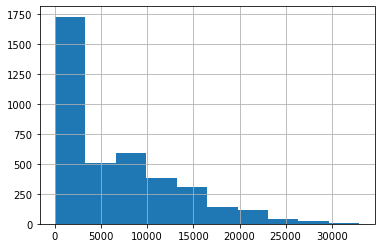

In [119]:
df_europe_yw["total_deaths_per_million"].hist()

In [120]:
df_europe_yw.head()

,yw,iso_code,location,new_deaths_per_million,total_deaths_per_million
0,202001,EST,Estonia,0.0,0.0
1,202001,GRC,Greece,0.0,0.0
2,202001,LVA,Latvia,0.0,0.0
3,202002,EST,Estonia,0.0,0.0
4,202002,GRC,Greece,0.0,0.0


In [136]:
min_deaths = df_europe_yw["total_deaths_per_million"].min()
max_deaths = df_europe_yw["total_deaths_per_million"].max()

In [137]:
bins_deaths = list(np.linspace(min_deaths, max_deaths, 5))

In [138]:
bins_deaths = [int(i.round()) for i in bins_deaths]

In [142]:
df_europe_yw["Total deaths per million"] = pd.cut(df_europe_yw["total_deaths_per_million"], bins=bins_deaths, precision=0)#.astype(str)


In [145]:
df_europe_yw['Total deaths per million'] = df_europe_yw['Total deaths per million'].replace(np.nan, 0.0)

In [143]:
df_europe_yw['Total deaths per million'] = df_europe_yw['Total deaths per million'].replace("nan", 0.0)

In [146]:
df_europe_yw.head()

,yw,iso_code,location,new_deaths_per_million,total_deaths_per_million,Total deaths per million
0,202001,EST,Estonia,0.0,0.0,NaN
1,202001,GRC,Greece,0.0,0.0,NaN
2,202001,LVA,Latvia,0.0,0.0,NaN
3,202002,EST,Estonia,0.0,0.0,NaN
4,202002,GRC,Greece,0.0,0.0,NaN


In [149]:
df_europe_yw.reset_index(drop=True, inplace=True)

In [150]:
df_europe_yw["Total deaths per million"]

0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
               ...        
3845     (8245.0, 16489.0]
3846    (16489.0, 24734.0]
3847    (16489.0, 24734.0]
3848     (8245.0, 16489.0]
3849     (8245.0, 16489.0]
Name: Total deaths per million, Length: 3850, dtype: category
Categories (4, interval[int64]): [(0, 8245] < (8245, 16489] < (16489, 24734] < (24734, 32978]]

In [155]:
df_europe_yw.head()

,yw,iso_code,location,new_deaths_per_million,total_deaths_per_million,Total deaths per million
0,202001,EST,Estonia,0.0,0.0,NaN
1,202001,GRC,Greece,0.0,0.0,NaN
2,202001,LVA,Latvia,0.0,0.0,NaN
3,202002,EST,Estonia,0.0,0.0,NaN
4,202002,GRC,Greece,0.0,0.0,NaN


In [161]:
df_europe_yw["new_deaths_per_million"] = df_europe_yw["new_deaths_per_million"].clip(0)

In [162]:
df_europe_yw["new_deaths_per_million"].describe()

count    3850.000000
mean       21.723749
std        29.537138
min         0.000000
25%         1.961500
50%         8.866500
75%        29.585250
max       197.976000
Name: new_deaths_per_million, dtype: float64

In [154]:
fig = px.scatter_geo(df_europe_yw, locations="iso_code", color="total_deaths_per_million",
                     hover_name="location", size="total_deaths_per_million",
                     projection="natural earth")
# focus point
lon_foc = 10.28
lat_foc = 51.13
fig.update_layout(
        geo = dict(
            projection_scale=4, #this is kind of like zoom
            center=dict(lat=lat_foc, lon=lon_foc), # this will center on the point
        ))
fig.show()

In [163]:
fig = px.scatter_geo(df_europe_yw, locations="iso_code", color="new_deaths_per_million",
                     hover_name="location", size="new_deaths_per_million",
                     animation_frame="yw",
                     projection="natural earth")
# focus point
lon_foc = 10.28
lat_foc = 51.13
fig.update_layout(
        geo = dict(
            projection_scale=4, #this is kind of like zoom
            center=dict(lat=lat_foc, lon=lon_foc), # this will center on the point
        ))
fig.show()

In [152]:
fig = px.scatter_geo(df_europe_yw, locations="iso_code", color="location",
                     hover_name="location", size="new_deaths",
                     animation_frame="yw",
                     projection="natural earth")
fig.show()

ValueError: Value of 'size' is not the name of a column in 'data_frame'. Expected one of ['yw', 'iso_code', 'location', 'new_deaths_per_million', 'total_deaths_per_million', 'Total deaths per million'] but received: new_deaths

In [108]:
df_europe_yw[df_europe_yw["yw"]=="202001"]

,yw,iso_code,location,new_deaths
0,202001,EST,Estonia,0.0
1,202001,GRC,Greece,0.0
2,202001,LVA,Latvia,0.0


In [110]:
df_europe_yw[df_europe_yw["yw"]=="202002"]

,yw,iso_code,location,new_deaths
3,202002,EST,Estonia,0.0
4,202002,GRC,Greece,0.0
5,202002,LVA,Latvia,0.0


In [111]:
df_europe[df_europe["yw"]=="202002"]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,lon,lat,formatted_date,yw
7054,EST,Europe,Estonia,2020-01-18,0.0,0.0,0.0,0.0,0.0,0.0,...,78.74,0.892,0.0,0.0,0.0,0.0,25.824726,58.643695,2020-01-18,202002
9247,GRC,Europe,Greece,2020-01-18,0.0,0.0,0.0,0.0,0.0,0.0,...,82.24,0.888,0.0,0.0,0.0,0.0,22.719813,39.066716,2020-01-18,202002
12786,LVA,Europe,Latvia,2020-01-18,0.0,0.0,0.0,0.0,0.0,0.0,...,75.29,0.866,0.0,0.0,0.0,0.0,24.833296,56.807175,2020-01-18,202002


In [115]:
df_europe[df_europe["yw"]=="202004"]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,lon,lat,formatted_date,yw
8512,DEU,Europe,Germany,2020-01-27,1.0,1.0,0.000,0.0,0.0,0.0,...,81.33,0.947,0.0,0.00,0.00,0.000000,10.288485,51.133723,2020-01-27,202004
8513,DEU,Europe,Germany,2020-01-28,4.0,3.0,0.000,0.0,0.0,0.0,...,81.33,0.947,0.0,0.00,0.00,0.000000,10.288485,51.133723,2020-01-28,202004
7780,FIN,Europe,Finland,2020-01-29,1.0,1.0,0.000,0.0,0.0,0.0,...,81.91,0.938,0.0,0.00,0.00,0.000000,26.211765,64.504094,2020-01-29,202004
8514,DEU,Europe,Germany,2020-01-29,4.0,0.0,0.000,0.0,0.0,0.0,...,81.33,0.947,0.0,0.00,0.00,0.000000,10.288485,51.133723,2020-01-29,202004
7781,FIN,Europe,Finland,2020-01-30,1.0,0.0,0.000,0.0,0.0,0.0,...,81.91,0.938,0.0,0.00,0.00,0.000000,26.211765,64.504094,2020-01-30,202004
8515,DEU,Europe,Germany,2020-01-30,4.0,0.0,0.000,0.0,0.0,0.0,...,81.33,0.947,0.0,0.00,0.00,0.000000,10.288485,51.133723,2020-01-30,202004
8516,DEU,Europe,Germany,2020-01-31,5.0,1.0,0.000,0.0,0.0,0.0,...,81.33,0.947,0.0,0.00,0.00,0.000000,10.288485,51.133723,2020-01-31,202004
25499,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,0.000,0.0,0.0,0.0,...,81.32,0.932,0.0,0.00,0.00,0.000000,-2.853135,53.914773,2020-01-31,202004
19781,RUS,Europe,Russia,2020-01-31,2.0,2.0,0.000,0.0,0.0,0.0,...,72.58,0.824,-5538.0,-3.33,-3.33,-37.954378,96.803318,61.961663,2020-01-31,202004
12055,ITA,Europe,Italy,2020-01-31,2.0,2.0,0.000,0.0,0.0,0.0,...,83.51,0.892,0.0,0.00,0.00,0.000000,12.140788,42.751183,2020-01-31,202004


In [113]:
df_europe["location"].value_counts()

Germany                   734
Finland                   732
Italy                     730
United Kingdom            730
Russia                    730
Spain                     729
Sweden                    729
Slovenia                  728
Denmark                   728
Estonia                   727
Belgium                   726
Greece                    707
Luxembourg                706
Austria                   705
Albania                   705
Croatia                   705
Switzerland               705
Romania                   704
Serbia                    704
North Macedonia           704
Latvia                    704
Iceland                   703
Netherlands               703
Belarus                   702
Ireland                   701
Lithuania                 701
Portugal                  700
Czechia                   700
Hungary                   698
Ukraine                   698
Poland                    697
Bosnia and Herzegovina    696
Slovakia                  695
Cyprus    